<a href="https://colab.research.google.com/github/vidyacheekuri/corrosion-prediction-project/blob/main/EDA_Modeling_Corrosion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Plot style
sns.set(style='whitegrid')

**1: Load Data**

In [2]:
# STEP 1: Load dataset (assume already uploaded to Colab environment)
file_path = "/content/Corrosion_Dataset.csv"

# Read from correct sheet and header
df = pd.read_csv(file_path)

# Rename columns
df.columns = [
    "Cover_Thickness_mm",
    "Reinforcement_Diameter_mm",
    "Water_Cement_Ratio",
    "Temperature_K",
    "Relative_Humidity_pct",
    "Chloride_Ion_Content_kgm3",
    "Time_Years",
    "Corrosion_Rate_uAcm2"
]

# Convert all to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Quick preview
df.head()

,Cover_Thickness_mm,Reinforcement_Diameter_mm,Water_Cement_Ratio,Temperature_K,Relative_Humidity_pct,Chloride_Ion_Content_kgm3,Time_Years,Corrosion_Rate_uAcm2
0,51,16,0.45,299,70,0.31,0.9,0.720
1,51,16,0.45,300,70,0.31,0.9,0.090
2,51,16,0.42,299,70,0.63,0.9,0.094
3,51,16,0.42,300,70,0.63,0.9,0.104
4,51,16,0.42,301,70,0.63,0.9,0.117


In [6]:
# Define the output file path
output_file_path = "/content/Corrosion_Dataset_processed.csv"

# Save the DataFrame to a CSV file
df.to_csv(output_file_path, index=False)

print(f"DataFrame saved to {output_file_path}")

DataFrame saved to /content/Corrosion_Dataset_processed.csv


**2: Basic Info + Missing Check**

In [7]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())

Shape: (144, 8)

Missing values:
 Cover_Thickness_mm           0
Reinforcement_Diameter_mm    0
Water_Cement_Ratio           0
Temperature_K                0
Relative_Humidity_pct        0
Chloride_Ion_Content_kgm3    0
Time_Years                   0
Corrosion_Rate_uAcm2         0
dtype: int64

Summary stats:
        Cover_Thickness_mm  Reinforcement_Diameter_mm  Water_Cement_Ratio  \
count          144.000000                 144.000000          144.000000   
mean            54.451389                  18.770833            0.415000   
std              8.539362                   2.091337            0.028235   
min             30.000000                  16.000000            0.300000   
25%             50.000000                  16.000000            0.400000   
50%             50.000000                  20.000000            0.400000   
75%             65.000000                  20.000000            0.432500   
max             70.000000                  25.000000            0.500000   

   

**3: Histograms for All Variables**

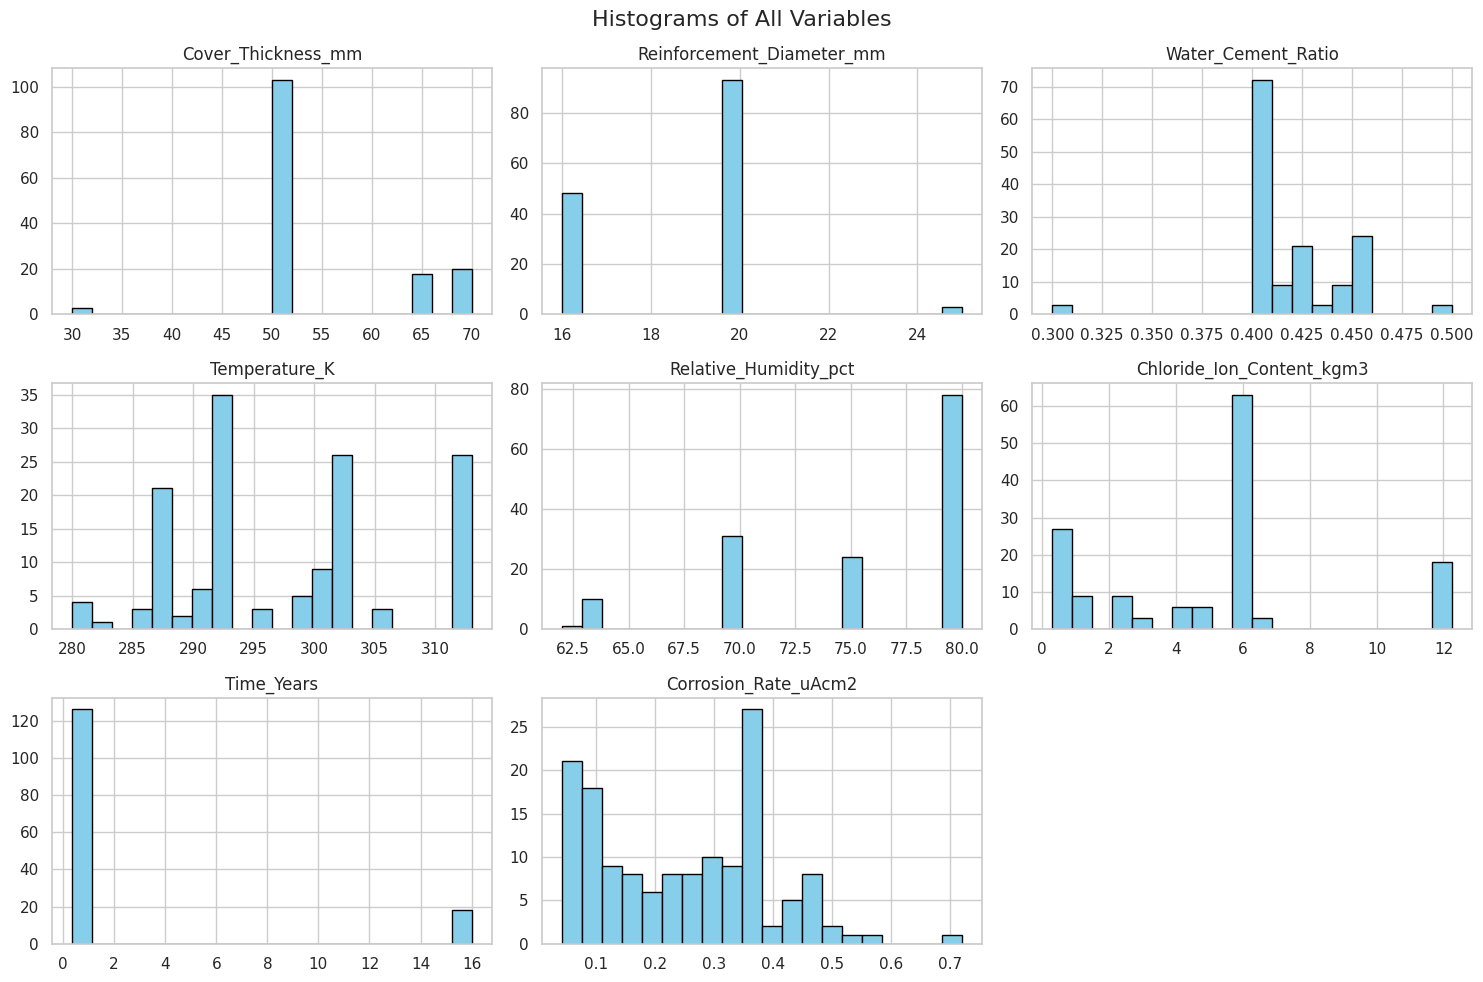

In [8]:
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of All Variables", fontsize=16)
plt.tight_layout()
plt.show()

**4: Boxplots for Outlier Detection**

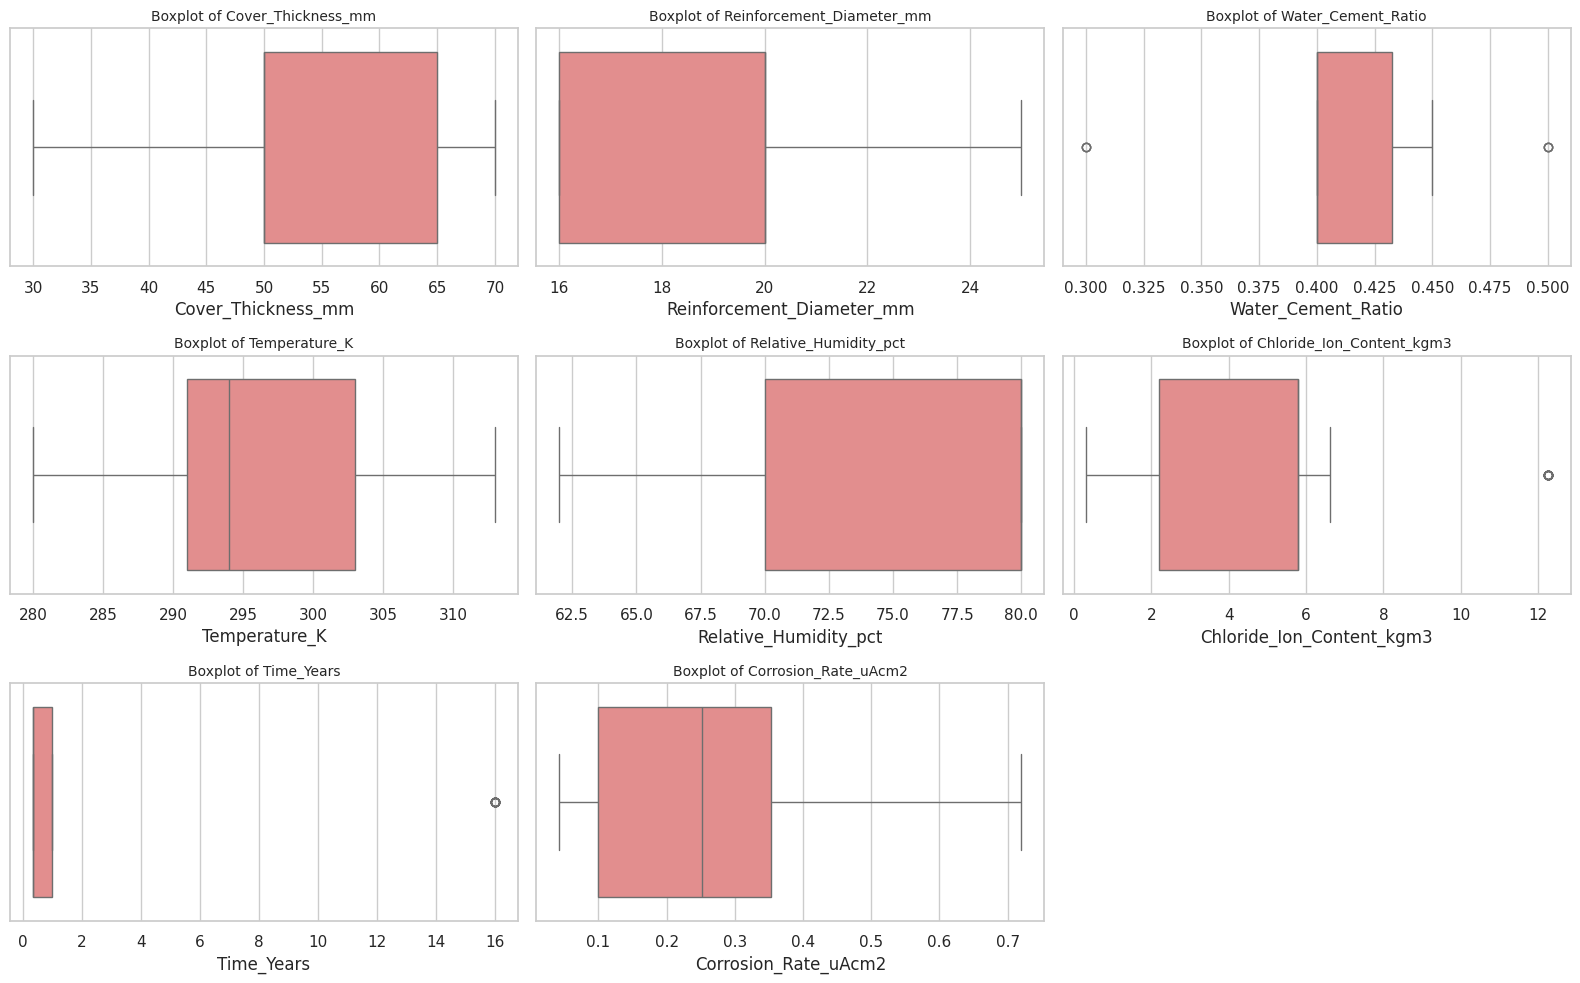

In [9]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}", fontsize=10)
plt.tight_layout()
plt.show()

**5: Correlation Heatmap**

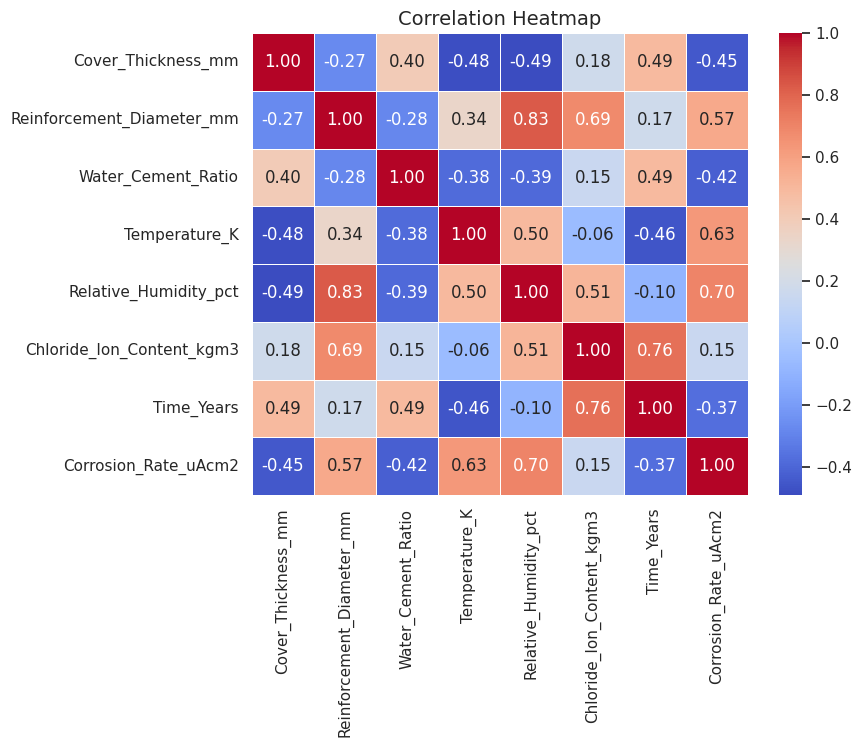

In [12]:
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

**6: Scatter Plots – Inputs vs Target**

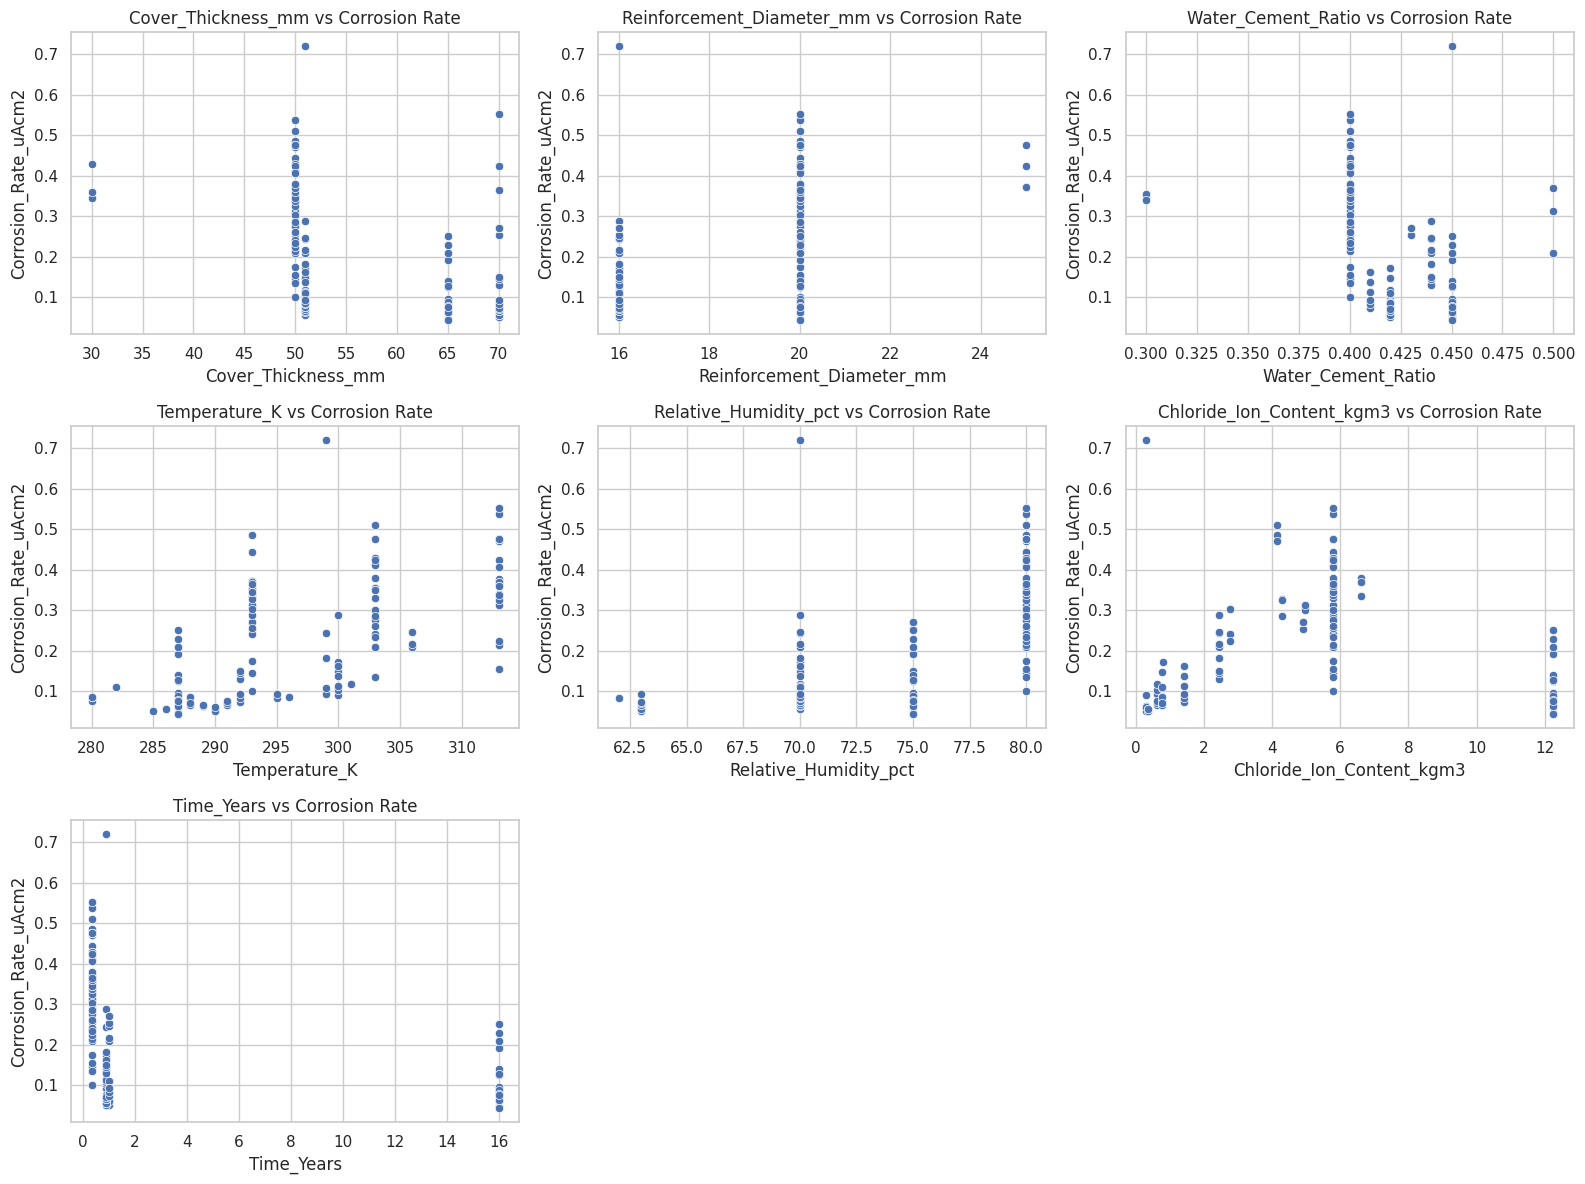

In [13]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude corrosion rate
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['Corrosion_Rate_uAcm2'])
    plt.xlabel(col)
    plt.ylabel('Corrosion_Rate_uAcm2')
    plt.title(f'{col} vs Corrosion Rate')
plt.tight_layout()
plt.show()